<a href="https://colab.research.google.com/github/sam2005-max/Auto_coast_prediction/blob/main/auto_coast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
# import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor
!pip install catboost
from sklearn import linear_model
from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.4 MB/s 


In [4]:
data = pd.read_csv("/content/sample_data/auto_costs (2).csv")
data

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [5]:
data.head(10)

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [6]:
data.name = data.name.apply(lambda x: x.split(' ')[0])
data.head(10)

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [7]:
a = data.replace("maxda", "mazda")
x = a.replace("Nissan", "nissan")
b = x.replace("porcshe", "porsche")
c = b.replace("toyouta", "toyota")
d = c.replace("vokswagen", "volkswagen")
e = d.replace("three", 3)
f = e.replace("four", 4)
g = f.replace("five", 5)
h = g.replace("six", 6)
i = h.replace("twelve", 12)
j = i.replace("two", 2)
k = j.replace("eight", 8)
df = k.replace("vw", "volkswagen")

df.head(100)

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,1,nissan,gas,std,2,hatchback,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7799.0
96,97,1,nissan,gas,std,4,sedan,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7499.0
97,98,1,nissan,gas,std,4,wagon,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7999.0
98,99,2,nissan,gas,std,2,hardtop,fwd,front,95.1,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,8249.0


In [8]:
dname = pd.unique(df.name)
dname

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'porcshce', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [9]:
# Finding all the numerical columns in the dataset. 
numCols = df.select_dtypes(include=['int64','float'])

# Sorting the columns
numCols = numCols[sorted(numCols.columns)]

# Printing the columns
print(numCols.columns)

Index(['ID', 'boreratio', 'carheight', 'carlength', 'carwidth', 'citympg',
       'compressionratio', 'curbweight', 'cylindernumber', 'doornumbers',
       'enginesize', 'highwaympg', 'horsepower', 'peakrpm', 'price', 'stroke',
       'symboling', 'wheelbase'],
      dtype='object')


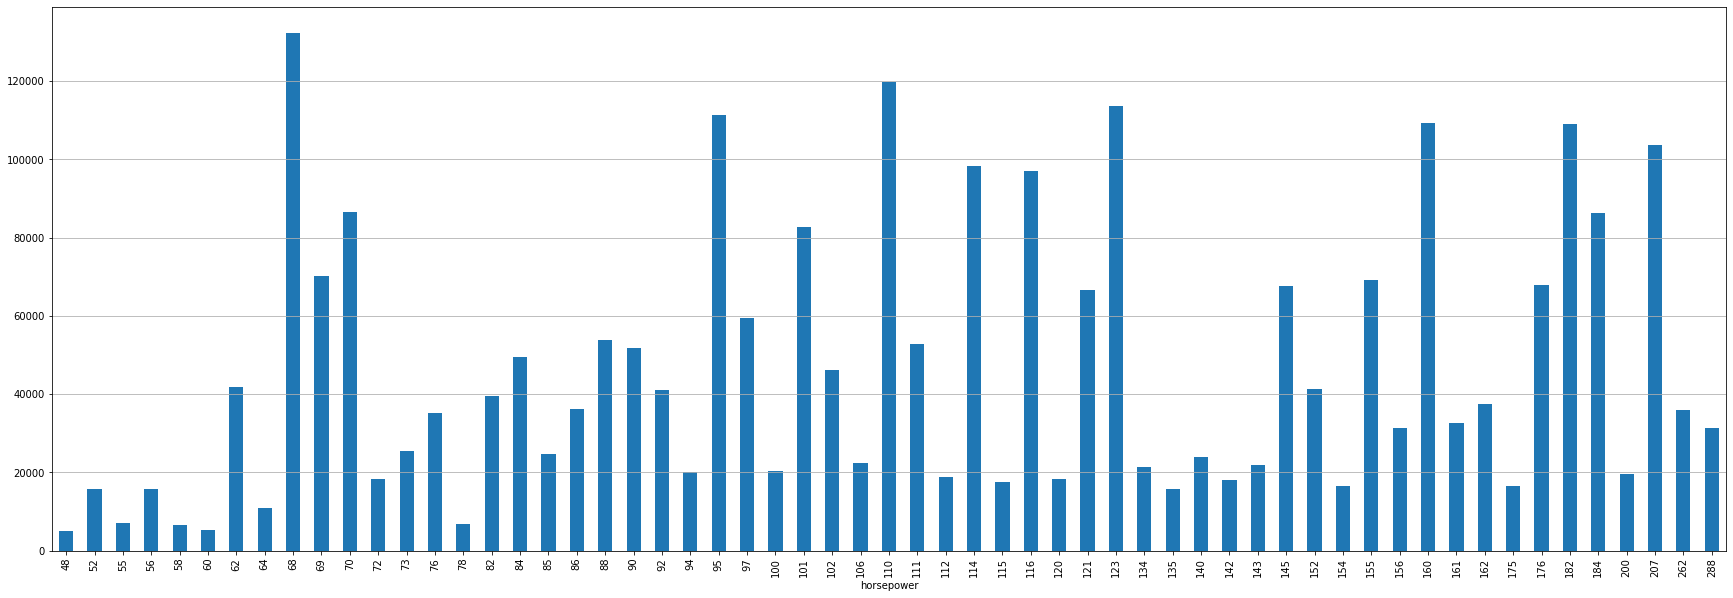

In [10]:
df.groupby('horsepower').sum()['price'].plot(kind = 'bar', figsize=(30,10))
plt.grid(axis = 'y')

Bore-stroke nisbati nima? - bu dvigatel tsilindrining teshik diametrining o'lchamlarining uning piston urish uzunligiga nisbati.

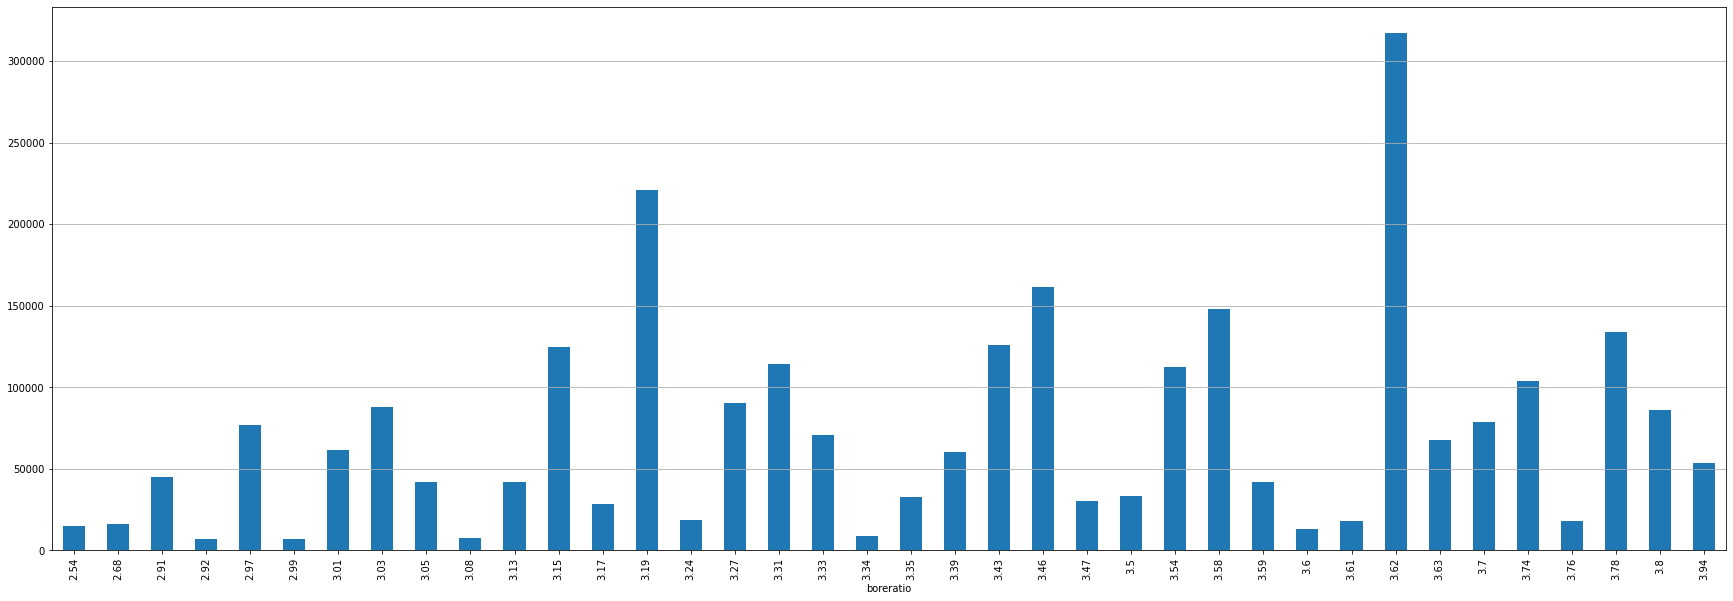

In [11]:
df.groupby('boreratio').sum()['price'].plot(kind = 'bar', figsize=(30,10))
plt.grid(axis = 'y')

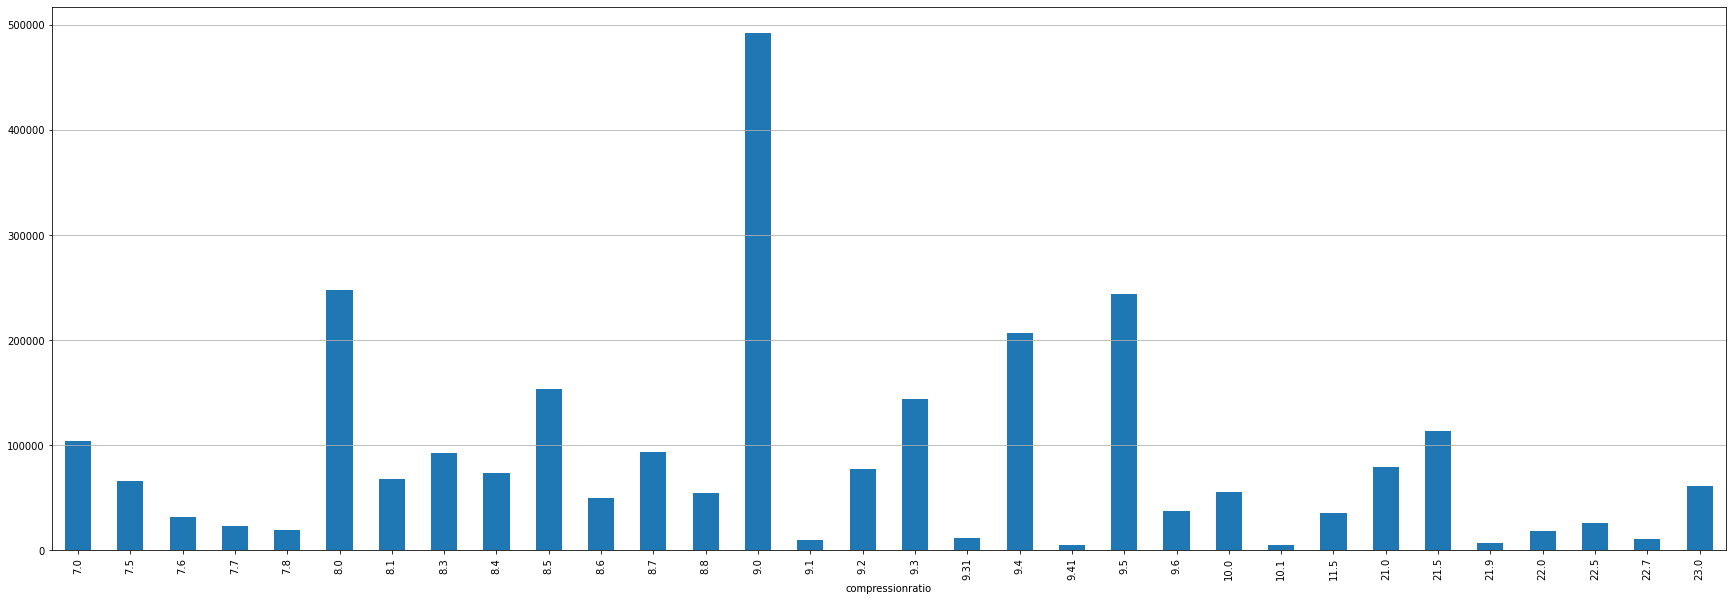

In [12]:
df.groupby('compressionratio').sum()['price'].plot(kind = 'bar', figsize=(30,10))
plt.grid(axis = 'y')

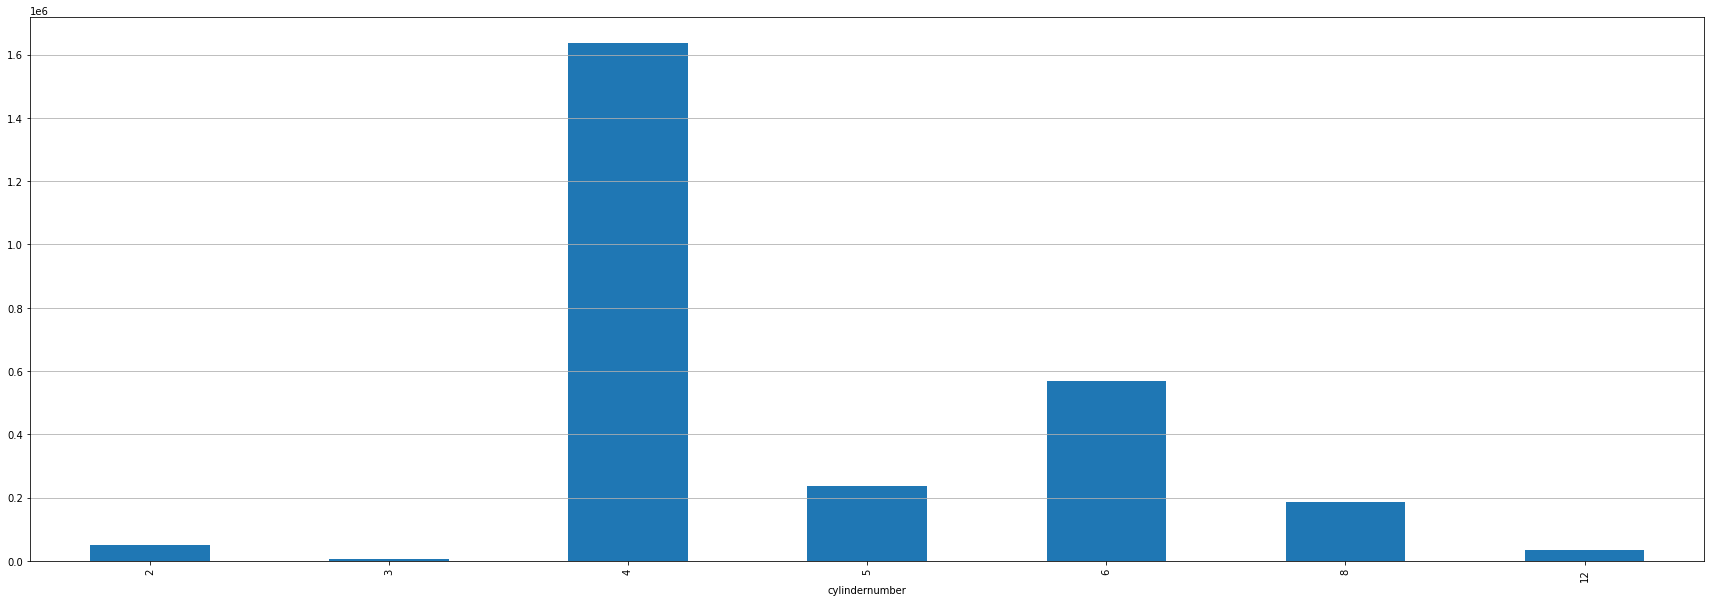

In [13]:
df.groupby('cylindernumber').sum()['price'].plot(kind = 'bar', figsize=(30,10))
plt.grid(axis = 'y')

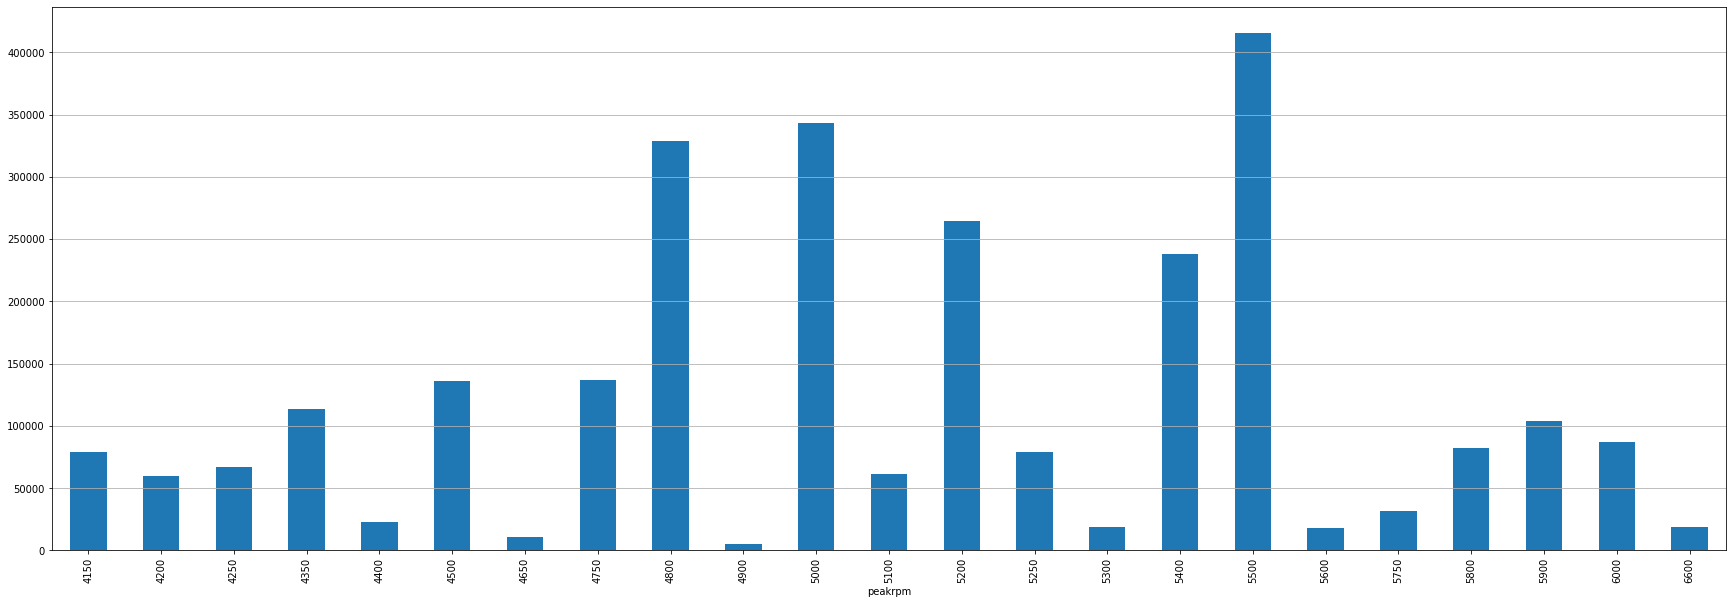

In [14]:
df.groupby('peakrpm').sum()['price'].plot(kind = 'bar', figsize=(30,10))
plt.grid(axis = 'y')

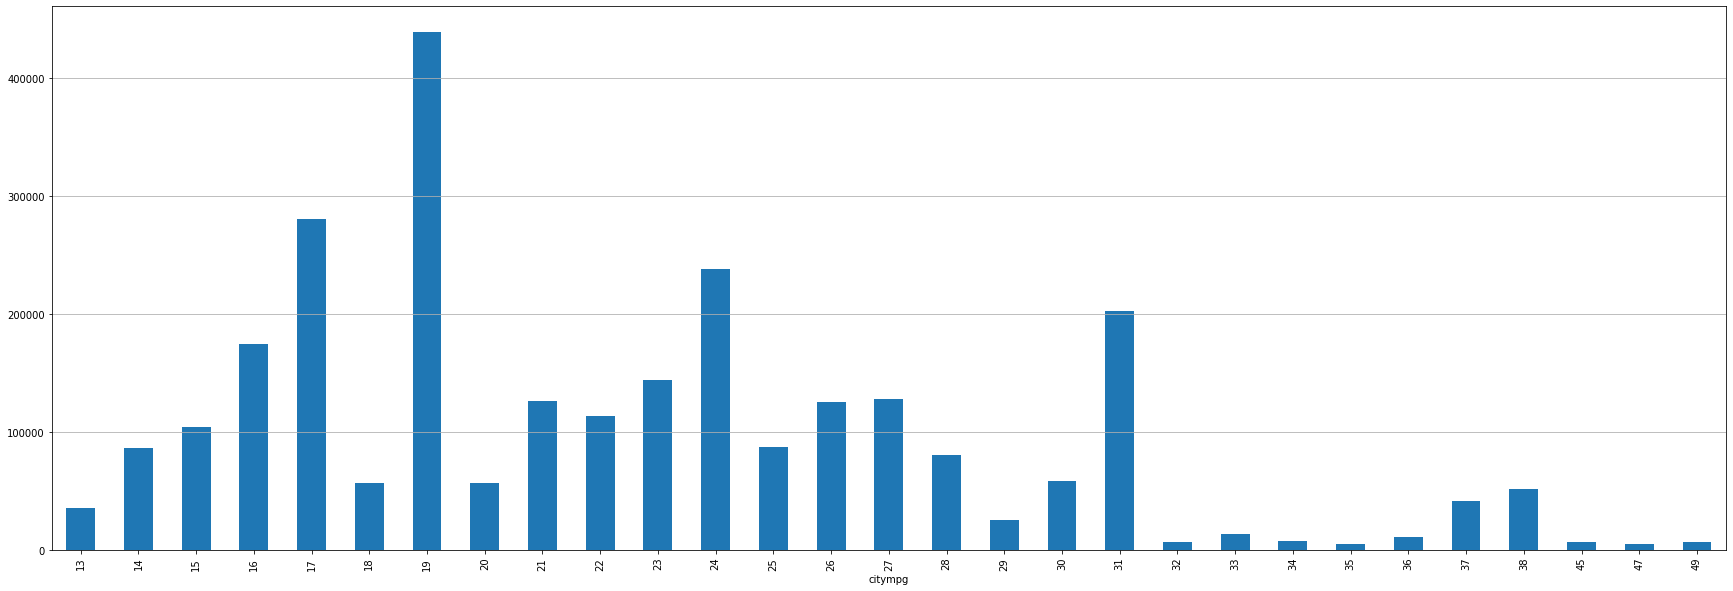

In [15]:
df.groupby('citympg').sum()['price'].plot(kind = 'bar', figsize=(30,10))
plt.grid(axis = 'y')

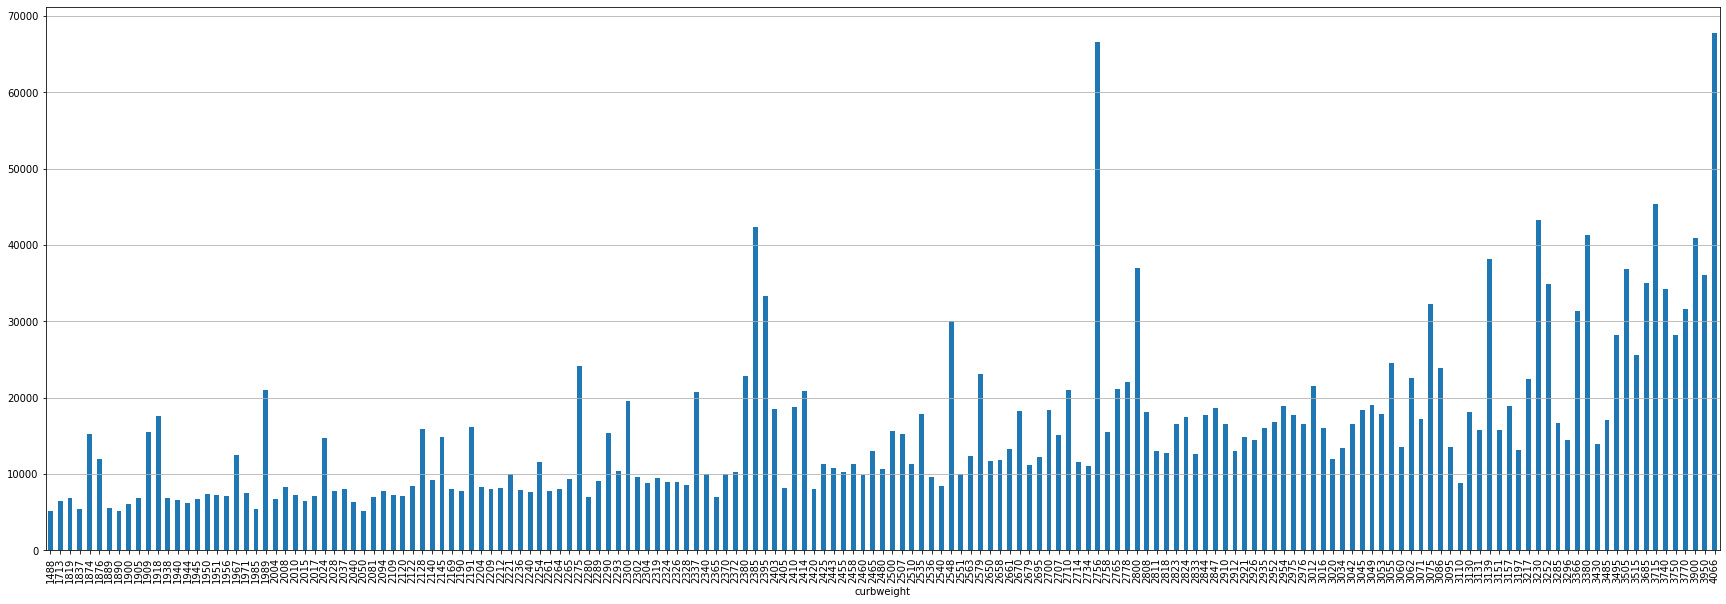

In [16]:
df.groupby('curbweight').sum()['price'].plot(kind = 'bar', figsize=(30,10))
plt.grid(axis = 'y')

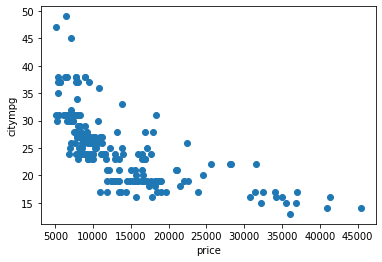

In [17]:
plt.scatter(df.price, df.citympg)
plt.xlabel('price')
plt.ylabel('citympg')
plt.show()


In [20]:
X = df[['citympg', 'peakrpm', 'boreratio', 'compressionratio', 'cylindernumber', 'horsepower', 'curbweight']]
y = df['price']


regr = linear_model.LinearRegression()
regr.fit(X, y)
prediction = regr.predict([[21, 5000, 3.47, 9.0, 4, 111, 2548]])

print(prediction)

[12824.26724914]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [21]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 16)



In [22]:
model = DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [23]:
y_pred = model.predict(x_test)

In [24]:
print(f"Model aniqligi: {round(r2_score(y_test,y_pred)*100)}%")

Model aniqligi: 86%


In [34]:
data_1 = {'citympg':30, 'peakrpm':500, 'boreratio':3.47, 'compressionratio':9.0, 'cylindernumber':6, 'horsepower':225, 'curbweight':2549, 'Model':'malibu '}
test = pd.DataFrame(data_1, index=[1])
test


,citympg,peakrpm,boreratio,compressionratio,cylindernumber,horsepower,curbweight,Model
1,30,500,3.47,9.0,6,225,2549,malibu


In [35]:
price = int(model.predict(test.iloc[:,:-1]))
name = test.iloc[0,7]

In [36]:
print(f"Model : {name}\nPrice : {price}$")

Model : malibu 
Price : 20970$
